<a href="https://colab.research.google.com/github/chelsieng/Fuzzy-FastSurferCNN/blob/stable/Report/MidtermReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the variability of FastSurferCNN when introducing perturbations with Fuzzy

# 👋🏽 Introduction

FastSurfer is a deep neural network architecture used in neuroimaging for brain segmentation. It is a significant improvement to FreeSurfer in terms of performance and architecture. It was extensively validated using several publicly available datasets [4]. 

My project goal is to study the stability of the FastSurferCNN when introducing perturbations in the network by using Fuzzy. In this report, I will go through what I learned to get me started, how I built a fuzzy environment, my current work in progress, and lastly, my future steps to reach my goal.

# 🔎 Related Work

During the first week, I focused on reviewing pre-trained neural networks used in neuroimaging. Afterwhich I will choose the most promising one to get started.

There are three types of neuroimaging software:
* Full-brain segmentation
    * use for measuring and visualizing the anatomical structures of the brain
* Brain extraction, also known as skull stripping
    * removes non-brain tissue from the brain image
* Pial surface reconstruction
    * use to check whether cortex was removed during skull stripping or, if not enough non-brain tissue was removed

## 🧠 Full brain segmentation

### 1️⃣ FastSurfer

FastSurfer mimics the pipeline of FreeSurfer but with better performance [4].

It consists of two parts: 
1. FastSurferCNN
2. surface recon


![fastsurferpipeline.jpg](\+ypf5KvhoiPkWsfZUv8lXw0RHyLWPsqX+Sr4aIj5FrH2VL/JV8NER8i1j7Kl/kq+GiI+Rax9lS/yVfDREfItY+ypf5KvhoiPkWsfZUv8AJV8NER8i1j7Kl/kq+GiI+Rax9lS/yVfDRFymh1lRwKVL/eyof5aIlkaz65II3xgwn2uK/wAhk6IpDTLPhwSHZKVSXRyNycIB9yfjoifO7X/MV+GiI2L/AJivw0RLNEX/2Q==)
<caption>Figure 1. FastSurfer Pipeline</caption>

The substantial improvements compared to FreeSurfer were made in the brain segmentation part, that is, FastSurferCNN.

**FastSurferCNN**

FastSurferCNN is a convolutional neural network that performs whole-brain segmentation into 95 classes in under 1 minute on GPU [4].

**Dataset**

FastSurferCNN was trained on 140 representative subjects with the following training, validation, and testing set [4].

Training Dataset: 
* Autism Brain Imaging Data
* Alzheimer’s Disease Neuroimaging Initiative (ADNI)
* Consortium for Neuropsychiatric Phenomics
* Open Access Series of Imaging Studies 1 and 2 (OASIS-1 & 2)

Validation and Testing Dataset:
* Data that were never seen from the training set (ADNI and OASIS-1)
* the Minimal Interval Resonance Imaging in Alzheimer’s Disease
* the Human Connectome Project
* multi-subject, multi-model neuroimaging dataset
* Traveling Human Phantom
* Mindboggle-101 dataset


**Architecture**

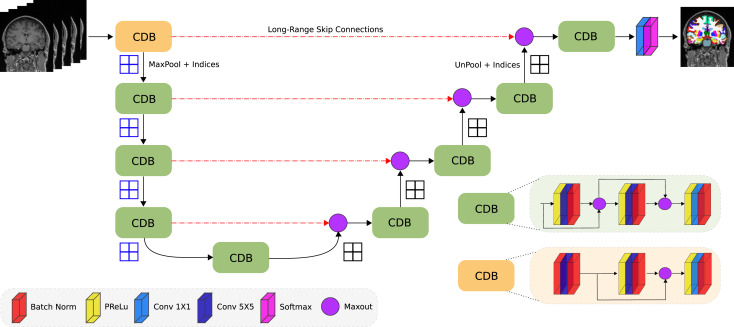
<caption>Figure 2. FastSurferCNN Architecture</caption>

Its architecture is similar to the U-Net model [6]. It has an encoder-decoder part together with skip connections.

FastSurferCNN has three fully CNNs following a sequence of 4 competitive dense blocks (CDB) in the encoder and decoder part separated by a bottleneck layer [4]. Each block is passed to the following operations: parametric ReLU, convolution, and batch normalization [4]. The PReLU of the first block is exceptionally replaced with batch normalization to normalize the raw inputs [4].

Unlike U-Net, the CDBs and skip connections use max-out activations instead of concatenation operations [4]. It helps in reducing memory requirements, hence creating a lightweight model [4]. It induces competition between feature maps in CDBs [4].

For skip connections, it performs a max-out operation on unpooled info from the decoder with the corresponding feature map from the encoder before feeding inputs to competitive dense decoder blocks [4].

**Specifications**

FastSurferCNN uses PyTorch. The authors provided a [complete tutorial](https://colab.research.google.com/github/Deep-MI/FastSurfer/blob/master/Tutorial/Tutorial_FastSurferCNN_QuickSeg.ipynb?authuser=1#scrollTo=87qEuu_fXuX9) on how to use it. 

It is available for [inference](https://github.com/Deep-MI/FastSurfer/tree/stable/FastSurferCNN#1-inference) using its pre-trained model. It also provides the option of [training](https://github.com/Deep-MI/FastSurfer/tree/stable/FastSurferCNN#3-training) the network from scratch. FastSurfer is very flexible as it allows installing the tool natively or through Docker. We can also choose our pipeline, i.e., running FastSurferCNN only, recon-surf only, or running FastSurfer as a whole pipeline.

➡️ Click [here](https://github.com/deep-mi/FastSurfer) for GitHub repo.

## 💀 Brain extraction

### 2️⃣ SynthStrip

**Dataset**

SynthStrip was trained on 80 training subjects, each with whole-head tissue segmentations [2].

Training data:
* 40 adult subjects from the Buckner40 dataset
* 30 locally scanned adult subjects from the Human Connectome Aging Project
* 10 infant subjects born full-term, scanned at Boston Children’s Hospital at 
ages between 0 and 18 months

Validation and Testing:
* 620 images
* Validation/test subsets of sizes 22/598, respectively. 
* Gathered these images across seven public datasets: IXI, FSM, ASL, QIN, Infant, CIM


**Architecture**

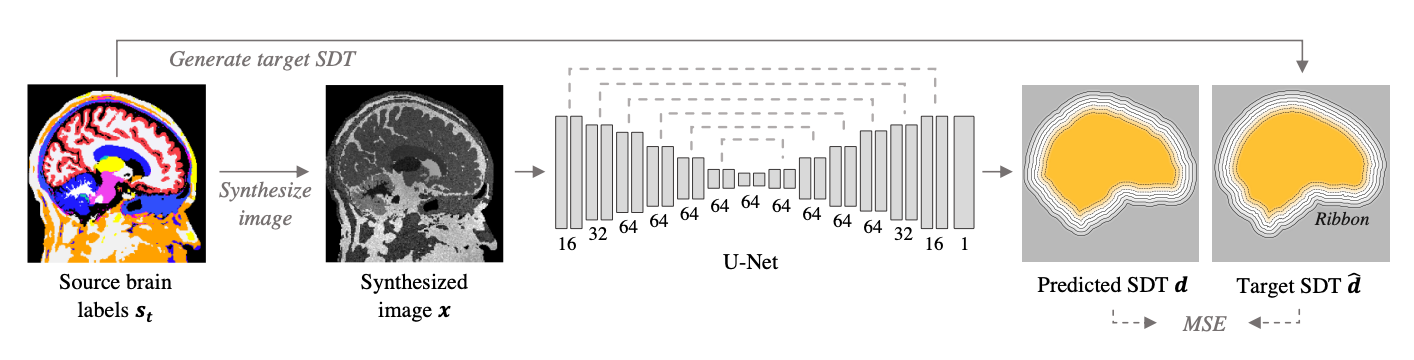
<caption>Figure 3. SynthStrip Training Framework</caption>

SynthStrip uses U-Net and follows the traditional deep learning training methods with data augmentation to improve generalization. Its goal is to optimize U-Net to minimize its loss and make the predictions match the target [2].

U-Net has seven resolution levels, which each includes two convolutional operations with leaky ReLU activations [2]. The final layer is a two-feature convolution with softmax activation that outputs a probabilistic segmentation representing non-brain and brain regions [2].

Before training, SynthStrip generates its brain image data by processing T1w scans with (Sequence Adaptive Multimodal SEGmentation) SAMSEG and reconstructing with the FreeSurfer reconstruction pipeline [2].

At each optimization step, the model uses a dataset sample to generate a gray-scale head scan using data transformation policies such as an affine transform (with random translation, scaling, and rotation) and a nonlinear deformation [2]. U-Net receives the synthesized image as input and predicts a thresholded signed distance transform representing the distance of each voxel to the skull boundary known as SDT [2].

**Specification**

SynthStrip uses PyTorch. 

Their data is available [here](https://surfer.nmr.mgh.harvard.edu/docs/synthstrip/
).

Their model is available as a .pt file [here](https://github.com/freesurfer/freesurfer/tree/dev/mri_synthstrip). 

Their tool is run using the command line within FreeSurfer or as a standalone utility using Docker or Singularity containers.

➡️ Click [here](https://github.com/freesurfer/freesurfer/tree/dev/mri_synthstrip) for GitHub repo.

### 3️⃣ HD BET

**Dataset**

* MRI data from a prospective randomized Phase II and III trials in 
neuro-oncology 
* the single-institutional Laboratory of Neuro Imaging dataset of the LONI 
    * 40 MRI scans from individual healthy human subjects
* the single-institutional NFBS dataset
    * 125 MRI scans from individual patients with a variety of clinical and subclinical psychiatric symptoms
* the CC-359 dataset 
    * 359 MRI scans from healthy adults

**Architecture**

The goal of HD BET was to overcome the limitations of Artificial Neural Networks (ANNs) for skull stripping [5]. Specifically, its training datasets either contained a collection of normal brain MRIs from public datasets or a limited number of (single institutional) brain MRIs with pathologies [5]. The brain extraction algorithm was mainly optimized to process T1-w MRI sequences [5]. Eventually, they fell short when processing other kinds of MRI sequences [5].

Their solution was to use MRI data from a large multicenter clinical trial in neuro-oncology to train and independently validate an ANN for brain extraction [5]. They improved the processing of other types of MRI sequences by masking MRI sequences during training and testing [5].
The neural network used the U-Net image segmentation architecture for training [5]. Through fivefold cross-validation, the five models were used as an ensemble for validation [5].

During both training and testing, the HD-BET algorithm was blindfolded to the type of MRI sequence used as input which allowed the development of an algorithm capable of performing brain extraction irrespective of the anatomical MRI sequence type [5].

**Specifications**

HDBET was implemented with PyTorch. However, there was not much information. They mentioned that their training code will not be available to the public.

## 💆🏻‍♂️ Pial surface reconstruction

### 4️⃣ PialNN

**Dataset**

PialNN dataset comes from the WU-Minn Human Connectome Project (HCP) Young Adult dataset. It uses a 200/50/50 split for training, validation, and testing respectively with 300 subjects. Each subject has a T1-weighted brain MRI scan with a 1 mm isotropic resolution input white matter surface with its ground truth pial surface [3]. 

**Architecture**

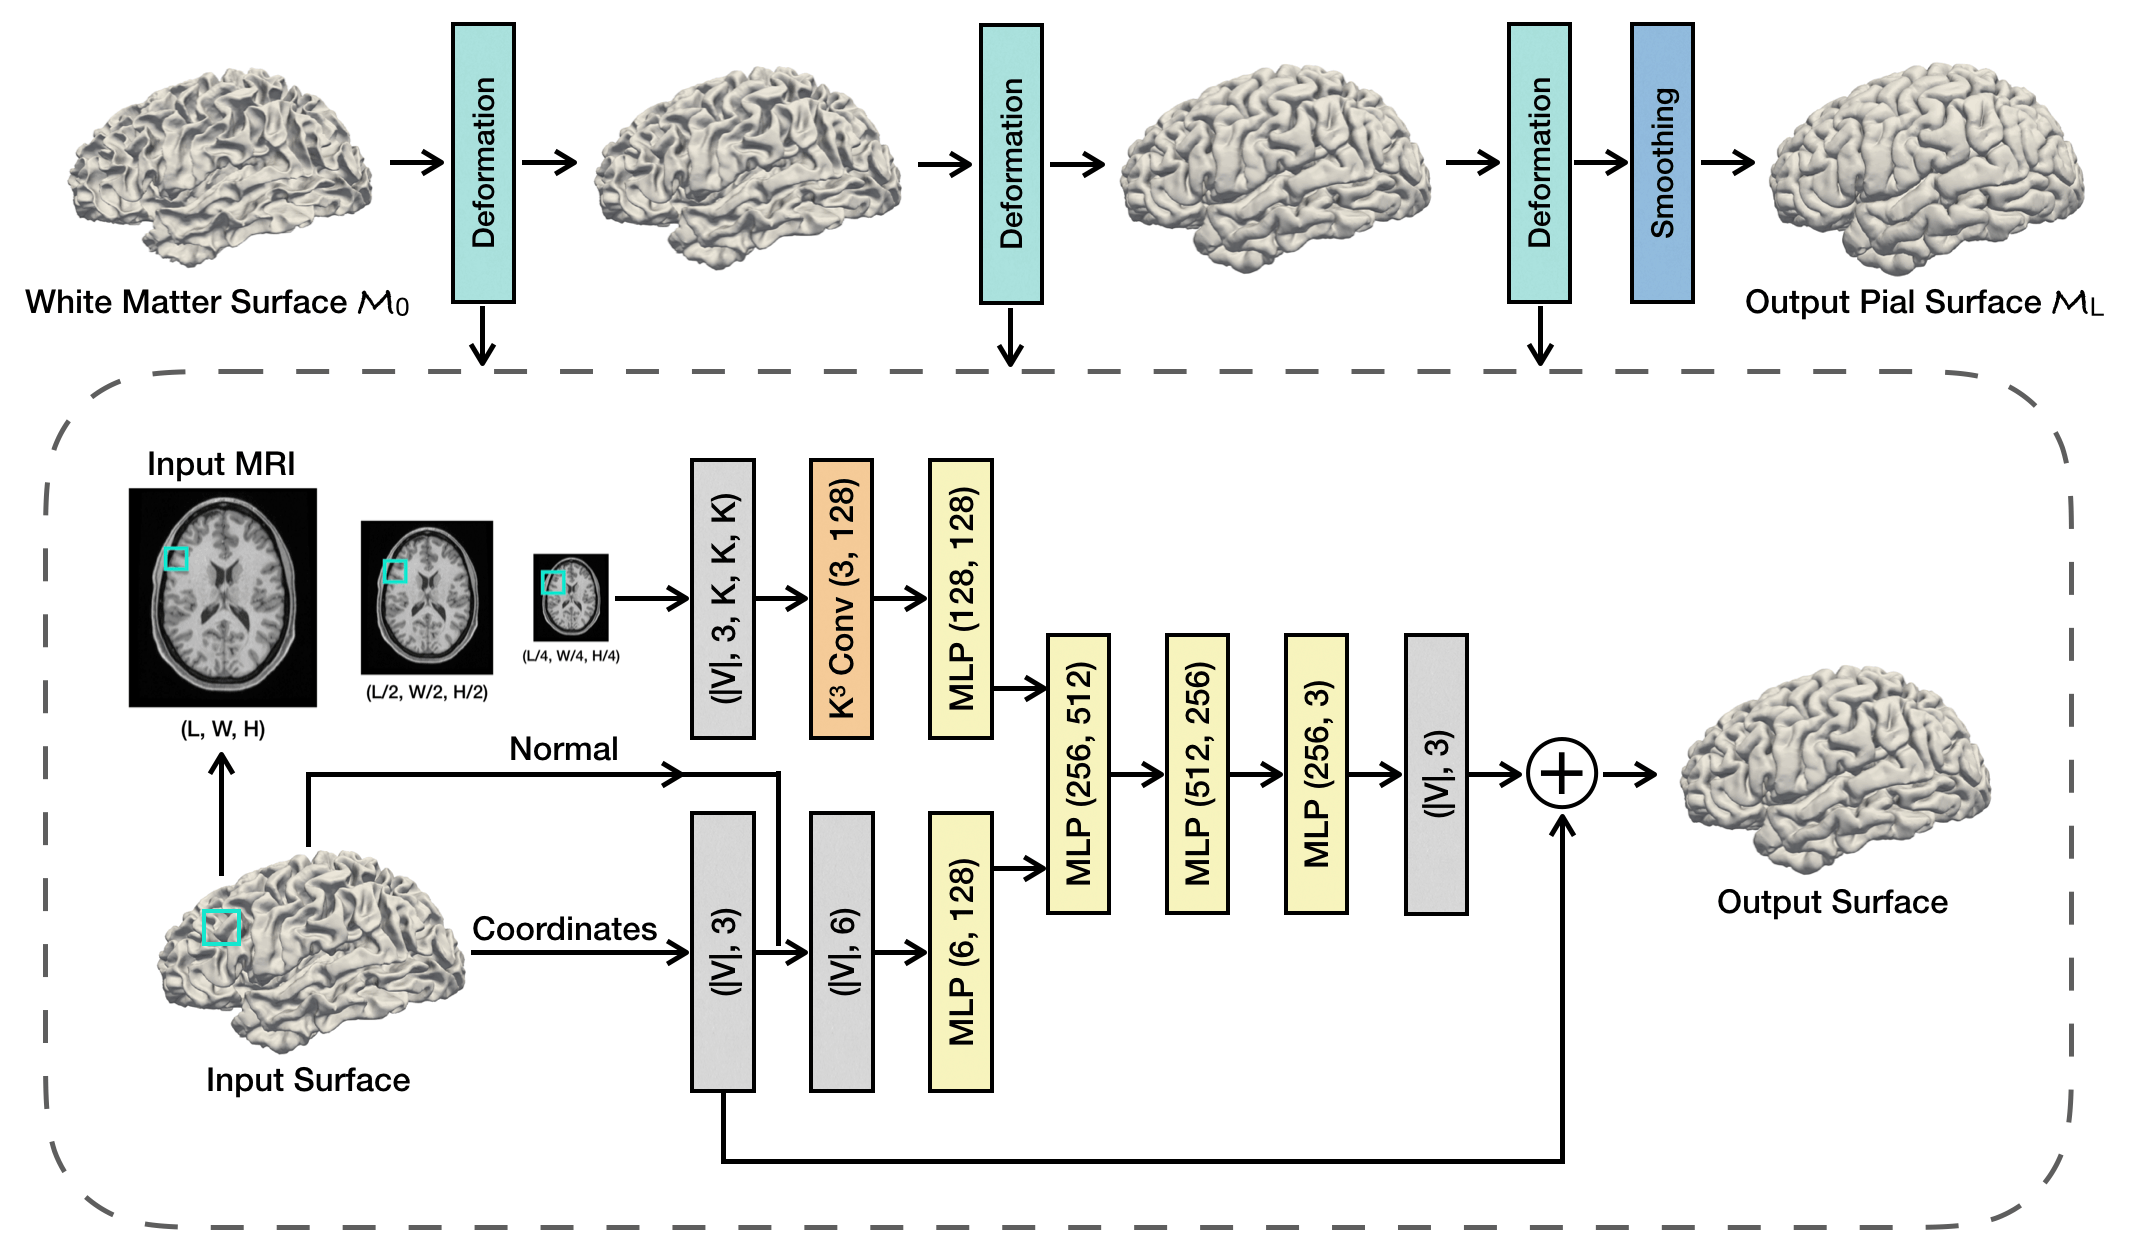
<caption>Figure 4. PialNN Architecture</caption>

The goal of PialNN  is to find a target pial surface, $M_*$ given an initial white matter surface $M_0$ [3]. 
Given that a 3D triangular mesh has (Vertices, Edges, Faces) as coordinates, 
they assumed that $M_*$ and $M_0$ have the same connectivity, i.e., they have the same edges and faces [3].


They do this by optimizing a neural network $g$ such that the coordinates $v_* = g(v_0, n_0, I)$ where $I$ is a brain MRI volume, $v_0$ and $n_0$ are the initial coordinates and the normal of the vertices of the mesh [3]. 

The input white matter surface is passed to three layers of deformation blocks to predict a pial surface [3].

Each deformation block predicts a displacement $\Delta v$ and incorporates two types of features of the vertex $v$, 

* point features from the white matter surface vertices 
    * feature extracted from its coordinate $v$ and normal $n$
    * includes spacial and orientation info
    * extracted using a multi-layer perceptron (MLP).
* local features from the brain MRI
    * a local convolutional operation to extract the local feature of a vertex from brain MRI scans
    * For each vertex, the corresponding position in the brain MRI volume is found
    * K3 grid is then constructed based on the vertex to exploit its neighborhood information and MRI intensity
    * Converted into a feature vector of its corresponding vertex
    * Passed to MLP layer to further refine the local feature

Point and local features are concatenated to the input of several MLP layers followed by leaky ReLU activations [3]. The new vertices v are updated and act as the input for the next deformation block [3].

The model uses the MSE loss function for optimization by computing a point-to-point mean square error loss between each pair of vertices only between the final predicted pial surface $M$ of the layer and  $M_*$ [3].

The output mesh is then refined using Laplacian smoothing to prevent self-intersections [3].


**Specifications**

PialNN uses PyTorch. The pre-trained models of PialNN for both left and right hemispheres are [available](https://github.com/m-qiang/PialNN/tree/main/ckpts/model) as .pt files.

➡️ Click [here](https://github.com/m-qiang/PialNN) for GitHub repo.

# ⚙️ Methodology

I decided to proceed with FastSurferCNN as I believe it was the one that was the most well packaged and documented to get me started. Besides, brain segmentation is broader and enables scalable big-data analysis and clinical applications such as structure localization or extraction of quantitative measures [4].

## 🌐 Dataset

The dataset I will be working on is T1 MRI brain images coming from [fmriprep-reproducibility](https://github.com/SIMEXP/fmriprep-reproducibility). They were selected from openneuro to create a resourceful dataset categorized by age, sex, and conditions. Here is an overview of the dataset:
```
{
  "ds000256": {
    "sub-CTS201": [
      "--participant-label CTS201" 
      ],
    "sub-CTS210": [
      "--participant-label CTS210" 
      ]
  },
  "ds001748": { 
    "sub-adult15": [
      "--participant-label CTS201" 
      ],
    "sub-adult16": [
      "--participant-label CTS210" 
      ]
  },
  "ds002338": {
    "sub-xp207": [
      "--participant-label CTS201" 
      ],
    "sub-xp201": [
      "--participant-label CTS210" 
      ]
  },
    "ds001600": {
    "sub-1": [
      "--participant-label 1" 
      ]
  },
    "ds001771": {
      "sub-36": [
        "--participant-label sub-36" 
        ]
  }
} 
```



## 📈 Monte-Carlo Arithmetic

To better understand the backbone of Fuzzy I will introduce the Monte-Carlo Arithmetic (MCA).

MCA is a probabilistic method of checking floating-point (FP) accuracy. It forces the results of floating-point operations to behave like random variables [1]. 

Suppose $x ∘ y$ is an FP operation, perturbations are introduced to this operation by converting it using the full MCA mode with inbound and outbound errors [7],

\begin{equation*} x\circ y\rightarrow round(inexact(inexact(x)\circ inexact(y))) \end{equation*} 

using 

\begin{equation*} inexact(x)=x+2^{e_{x}-t}\xi \end{equation*}
where

$t$ is a user-defined virtual precision,

$e_{x}$ is the exponent of the FP value ${x}$ and,

$ξ$ is a uniformly distributed random variable in the range [
   $-\frac{1}{2}$,$\frac{1}{2}$].

Given an exact solution $x$ of a known problem, we can then measure the relative error between the approximated value $\hat{x}$ and $x$ using appropriate formulae [7]. 

Now that we know what is MCA, we will now see how we can automate this method.

## ✅ Verificarlo

Verificarlo is a compiler tool that automatically uses the Monte Carlo arithmetic for automatic MCA analysis [7]. It takes as input a source code project. During compilation, all floating-point operations are replaced  by their MCA equivalent [7]. This instrumentation can be applied to the whole program or only to a function of interest [7]. 

And this is where Fuzzy comes in.

## 🤖 Fuzzy

The goal of Fuzzy is to provide an environment in which we can evaluate the stability of tools and pipelines [7]. It instruments your source code project so that the latter experience the fuzz.

Fuzzy has instrumented versions of libraries such as libmath, lapack, python3, NumPy, and several other recompiled ones [1].

For my part, I tried introducing perturbations in FastSurfer with python3 by using the instrumented version of python3.6.

Now that we know what Fuzzy is really about, it is time to explain how to build a Fuzzy environment. 

## 🛠 Building Fuzzy Python

To ease dependency conflicts and leverage the reproductions of environments, I will use Docker to run the tools. 

First I needed to build a Fuzzy python.

A fuzzy python image is available on [DockerHub](https://hub.docker.com/r/verificarlo/fuzzy/tags) by using the following command:

    $ docker pull verificarlo/fuzzy:v0.6.0-lapack-python3.8.5

However, FastSurfer requires python version 3.6, therefore I had to rebuild an image for python3.6 with the following Dockerfile:
   
    ARG VERIFICARLO_VERSION=v0.6.0
    FROM verificarlo/fuzzy:${VERIFICARLO_VERSION}-lapack

    # Use IEEE mode for compiling with verificarlo
    RUN echo "libinterflop_ieee.so" > $VFC_BACKENDS_FROM_FILE

    # Remove any existing python packages
    RUN apt -y -qqq remove python3

    ## Build Python 3.6.15 from source and the associated pip
    RUN cd /opt/build/ && \
        wget https://www.python.org/ftp/python/3.6.15/Python-3.6.15.tgz && \
        tar xvf Python-3.6.15.tgz && \
        cd Python-3.6.15 && \
        LDFLAGS="--conservative --exclude-file=/tmp/python-vfc-exclude.txt" \
        CFLAGS="--conservative --exclude-file=/tmp/python-vfc-exclude.txt" \
        LDSHARED='verificarlo-c -shared' \
        ./configure --with-ensurepip=install &&\
        make -j &&\
        make install &&\
        wget https://bootstrap.pypa.io/pip/3.6/get-pip.py &&\
        python3 get-pip.py

    # Remove temporary files
    RUN rm -rf /opt/build/*

    # Restore default MCA mode
    RUN echo "libinterflop_mca.so -m rr" > $VFC_BACKENDS_FROM_FILE

    # Set entrypoint
    ENTRYPOINT [ "/bin/bash"]


After building the fuzzy:python3.6.15 image, I made sure to test it.


```
$ python3 -c "print([sum([.001]*1000) for _ in range(3)])"
Info [verificarlo]: load backend with precision-binary32 = 24, precision-binary64 = 53, mode = rr, error-mode = rel, max-abs-error-exponent = 112, daz = false, ftz = false and sparsity = 1.000000
[1.0, 0.9999999999999998, 1.0000000000000002]
```

As we can see from the above, we have three different sums, concluding a successful build.

In the next section we will see how I built a FastSurferCNN image.

## 🏄🏻‍♂️ Building FastSurferCNN

FastSurfer can also be run using Docker. The authors provided five different Dockerfiles that are ready for running:

*   the whole FastSurfer pipeline (FastSurferCNN + recon-surf, with [GPU](https://github.com/Deep-MI/FastSurfer/blob/stable/Docker/Dockerfile) and [CPU](https://github.com/Deep-MI/FastSurfer/blob/stable/Docker/Dockerfile_CPU))
*   the segmentation network only (FastSurferCNN with [GPU](https://github.com/Deep-MI/FastSurfer/blob/stable/Docker/Dockerfile_FastSurferCNN) and [CPU](https://github.com/Deep-MI/FastSurfer/blob/stable/Docker/Dockerfile_FastSurferCNN_CPU))
* the surface pipeline only ([recon-surf](https://github.com/Deep-MI/FastSurfer/blob/stable/Docker/Dockerfile_reconsurf) with CPU)

Since I am only concerned with the segmentation part, I built a FastSurferCNN image with GPU with the following docker file:



```
## Start with Docker pytorch base
FROM nvidia/cuda:10.0-cudnn7-runtime-ubuntu16.04
ENV LANG=C.UTF-8
ARG PYTHON_VERSION=3.6

# Install custom libraries
RUN apt-get update && apt-get install -y --no-install-recommends \
         git \
         wget && \
         rm -rf /var/lib/apt/lists/*
	 
# Install miniconda and needed python packages (for FastSurferCNN)
RUN wget -qO ~/miniconda.sh https://repo.continuum.io/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh  && \
     chmod +x ~/miniconda.sh && \
     ~/miniconda.sh -b -p /opt/conda && \
     rm ~/miniconda.sh && \
     /opt/conda/bin/conda install -y python=$PYTHON_VERSION numpy scipy matplotlib h5py scikit-image && \
     /opt/conda/bin/conda install -y -c pytorch cudatoolkit=10.0 "pytorch=1.2.0=py3.6_cuda10.0.130_cudnn7.6.2_0" torchvision=0.4.0 && \
     /opt/conda/bin/conda install -y -c conda-forge scikit-sparse nibabel=2.5.1 pillow=8.3.2 && \
     /opt/conda/bin/conda clean -ya
ENV PYTHONUNBUFFERED=0 \
    PATH=/opt/conda/bin:$PATH

# install pip related dependencies
RUN python$PYTHON_VERSION -m pip install -U git+https://github.com/Deep-MI/LaPy.git#egg=lapy

# Add FastSurfer (copy application code) to docker image
COPY ./FastSurferCNN /FastSurferCNN/
COPY ./checkpoints /FastSurferCNN/checkpoints/
WORKDIR "/FastSurferCNN"

ENTRYPOINT ["python3.6", "eval.py"]
```
FastSurferCNN is more feasible when running on a GPU. Considering that Fuzzy may increase execution time and that my local machine is not compatible with NVIDIA, I learned about using Compute Canada and running jobs on a cluster. The cluster uses Singularity instead of Docker. Therefore, I had to convert my docker image into a singularity image to be able to run the container on the cluster:


```
$ docker run -v /var/run/docker.sock:/var/run/docker.sock \
             -v /tmp/simg:/output \
             --privileged -t --rm \
             quay.io/singularity/docker2singularity \
             --name fastsurfercnn fastsurfercnn:gpu
``` 

I made a test run with an example subject that FastSurfer provided in their [tutorial](https://colab.research.google.com/github/Deep-MI/FastSurfer/blob/master/Tutorial/Tutorial_FastSurferCNN_QuickSeg.ipynb?authuser=1#scrollTo=87qEuu_fXuX9) to check if the build was successful.

In [ ]:
#@title ▶️ Click the run button to download the example subject from FastSurfer Tutorial
!curl -k https://surfer.nmr.mgh.harvard.edu/pub/data/tutorial_data/buckner_data/tutorial_subjs/140/mri/orig.mgz -o /content/140_orig.mgz
img = "/content/140_orig.mgz"

In [ ]:
#@title ▶️ Click the run button if you want to download the example subject on your local machine
from google.colab import files
files.download("/content/140_orig.mgz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Since the focus is to run an inference with the pre-trained FastSurferCNN, the main script to run is called [eval.py](https://github.com/Deep-MI/FastSurfer/blob/stable/FastSurferCNN/eval.py). Many options can be selected and set via the command line.

I used the following command:

```
$ singularity run --bind ./dummy/:/dummy ./simg/fastsurfercnn.sif 
                    --i_dir ./dummy \
                    --in_name 140_orig.nii.gz \
                    --o_dir ./output \
                    --out_name mri/aparc.DKTatlas+aseg.deep.mgz \
                    --log deep_surfer.log
```

where 

`--i_dir`: Path to the input data directory 

`--in_name`: name of the MRI_data

`--o_dir`: Path to where should predictions be saved. 

`--out_name`: name of the prediction with file format mgz, nii, or nii.gz 

`--log`: name of log-file where information about processing is stored here. Saved in the same directory as the predictions.

In [ ]:
#@title ▶️ Click the run button to see how the output looks like when running the model inference.
import os
import sys
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/deep-mi/fastsurfer.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  sys.path.append(project_name)

# Go to the FastSurfer directory
%cd /content/fastsurfer/

# Run the program
! ./run_fastsurfer.sh --t1 $img \
                      --sd /content/fastsurfer_seg \
                      --sid Tutorial \
                      --seg_only --py python3

## 🌊 FastSurferCNN with Fuzzy Python

Now that fuzzy python and FastSurferCNN are ready, I can introduce fuzzy into the neural network. To do this, I built another image using a [multi-stage build](https://github.com/verificarlo/fuzzy#using-fuzzy-in-multi-stage-builds) as follows:



```
FROM fuzzy:python3.6.15 as fuzzy

# Your target image
FROM fastsurfercnn:gpu

# Copy libmath fuzzy environment from fuzzy image, for example
RUN mkdir -p /opt/mca-libmath
COPY --from=fuzzy /opt/mca-libmath/libmath.so /opt/mca-libmath/
COPY --from=fuzzy /usr/local/lib/libinterflop* /usr/local/lib/

# If you will also want to recompile more libraries with verificarlo, add these lines
COPY --from=fuzzy /usr/local/bin/* /usr/local/bin/
COPY --from=fuzzy /usr/local/include/* /usr/local/include/

ENV VFC_BACKENDS 'libinterflop_mca.so --precision-binary32=24 --precision-binary64=53 --mode=mca'
ENV LD_PRELOAD '/opt/mca-libmath/libmath.so'
RUN unset LD_PRELOAD

ENTRYPOINT [ "/bin/bash"]
```

Unfortunately, while testing the new image with the command `python3 -c "print([sum([.001]*1000) for _ in range(3)])"` and verifying the python version, I noticed that it was not using the fuzzy python3.6 interpreter but, instead it was using the python3.6 installed through miniconda in the FastSurferCNN image. Hence, there was no fuzzy environment in the new image.

I tried to allocate a terminal so that I interact directly inside the container to change the default python version using `update-alternatives`  but in vain. Setting the `$PYTHONPATH`  in the docker file did not work either.

This section is still a work in progress. I plan to combine the build stages of fuzzy python3.6 and FastSurferCNN into a three-layer build and keep only the fuzzy python3.6 in the container.

The three layers would look like:
1. Start from Ubuntu 18 Nvidia/Cuda image
2. Rebuild Ubuntu 18 fuzzy/verificarlo image from #1.

    2.5. remove existing Python interpreter
3. Build fuzzy-python from #2


# 🔮 What's next

Up until now, I have been setting up a fuzzy environment for FastSurferCNN. In the upcoming weeks, I will continue working on FastSurferCNN with Fuzzy python. I also aim to get started with the analysis of the variability of the neural network. Below is an overview of my next steps:
* Run inference FastSurferCNN with and without fuzzy on the fmriprep-reproducibility dataset
* Convert segmented brain structures into NumPy arrays
* Compare original brain structures with approximated brain structures using the Dice Coefficient
* Report experimental results

Overall I am satisfied with my progress, considering how fast it went. I am constantly learning, and I look forward to doing as much as I can in the remaining of the semester.





# 📄 References 

[1]
A. Salari, Y. Chatelain, G. Kiar, and T. Glatard, ‘Accurate simulation of operating system updates in neuroimaging using Monte-Carlo arithmetic’, Aug. 2021, doi: 10.48550/arXiv.2108.03129. [Online]. Available: https://arxiv.org/abs/2108.03129v1. [Accessed: Jun. 04, 2022]

[2]
A. Hoopes, J. S. Mora, A. V. Dalca, B. Fischl, and M. Hoffmann, ‘SynthStrip: Skull-Stripping for Any Brain Image’, Mar. 2022, doi: 10.48550/arXiv.2203.09974. [Online]. Available: https://arxiv.org/abs/2203.09974v1. [Accessed: Jun. 04, 2022]

[3]
Q. Ma, E. C. Robinson, B. Kainz, D. Rueckert, and A. Alansary, ‘PialNN: A Fast Deep Learning Framework for Cortical Pial Surface Reconstruction’, Sep. 2021, doi: 10.48550/arXiv.2109.03693. [Online]. Available: https://arxiv.org/abs/2109.03693v1. [Accessed: Jun. 04, 2022]

[4]
L. Henschel, S. Conjeti, S. Estrada, K. Diers, B. Fischl, and M. Reuter, ‘FastSurfer - A fast and accurate deep learning based neuroimaging pipeline’, NeuroImage, vol. 219, p. 117012, Oct. 2020, doi: 10.1016/j.neuroimage.2020.117012. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S1053811920304985. [Accessed: Jun. 04, 2022]

[5]
F. Isensee et al., ‘Automated brain extraction of multisequence MRI using artificial neural networks’, Hum Brain Mapp, vol. 40, no. 17, pp. 4952–4964, Dec. 2019, doi: 10.1002/hbm.24750. [Online]. Available: https://onlinelibrary.wiley.com/doi/10.1002/hbm.24750. [Accessed: Jun. 04, 2022]

[6]
‘Skip Connections | All You Need to Know About Skip Connections’, Analytics Vidhya, Aug. 24, 2021. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/08/all-you-need-to-know-about-skip-connections/. [Accessed: Jun. 04, 2022]

[7]
C. Denis, P. De Oliveira Castro, and E. Petit, ‘Verificarlo: Checking Floating Point Accuracy through Monte Carlo Arithmetic’, in 2016 IEEE 23nd Symposium on Computer Arithmetic (ARITH), Jul. 2016, pp. 55–62, doi: 10.1109/ARITH.2016.31.
